# Question 6: The West Coast Heat Wave, Figure 3b

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_349/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [7]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

Newport's coordinates are 44.6368° N, 124.0535° W. 

In [13]:
# Calculating offshore coordinates
def calculate_offshore_coordinate(lat, lon, distance, radius):
    lat_radian = lat/360*2*np.pi
    lat_radius = radius*np.cos(lat_radian)
    delta_lon = distance/(lat_radius*2*np.pi)*360
    return lat, lon - delta_lon


earth_radius = 6378.1
lat, lon = calculate_offshore_coordinate(44.6368, -124.0535, 1, earth_radius)
print(lat, lon)

44.6368 -124.0661243979481


In [15]:
newport = ds.analysed_sst.sel(lat = lat, lon = lon, method = 'nearest') - 273.15
newport = newport.rolling(time = 30, center = True).mean()

In the plot, the light grey area will represent the envelope of maximum and minimum values during 2002–2013 while the dark grey will represent the envelope of ±1 SD around the mean during 2002–2013.

In [16]:
# 2002 to 2013 Data
years = newport.sel(time = slice('2002', '2013')).groupby("time.dayofyear")

years_avg = years.mean()
years_max, years_min = years.max(), years.min()
years_std = years.std()
years_upper = years_avg + years_std
years_lower = years_avg - years_std

The black, blue, red, and green lines will represent the means during 2014, 2015, and 2016, respectively. 

In [17]:
# 2014, 2015, 2016 Data

year14_avg = newport.sel(time = '2014').groupby("time.dayofyear").mean()
year15_avg = newport.sel(time = '2015').groupby("time.dayofyear").mean()
year16_avg = newport.sel(time = '2016').groupby("time.dayofyear").mean()

The plot shows a time series of daily SSTs and winds, smoothed with a 30 day running mean.

The following is Figure 3b: SST 1km offshore.

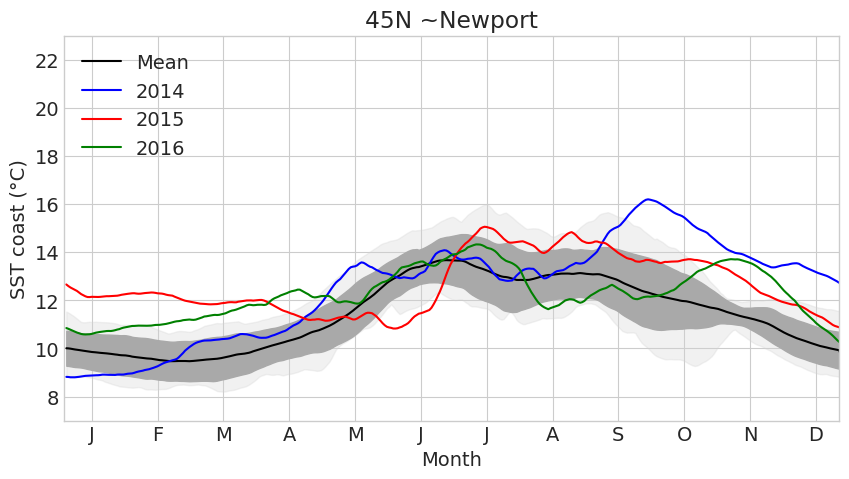

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

# light grey section: min and max values for 2002-2013
plt.fill_between(years_avg.dayofyear.values, years_min, years_max, color = 'lightgray', alpha = 0.3)

# dark grey: ±1SD around the mean for 2002-2013
plt.fill_between(years_avg.dayofyear.values, years_lower, years_upper, color = 'darkgray')

# black line: 2002-2013
plt.plot(years_avg.dayofyear.values, years_avg, 'k', label = 'Mean')

# blue line: 2014 
plt.plot(year14_avg.dayofyear.values, year14_avg, 'b', label = '2014')

# red line: 2015 
plt.plot(year15_avg.dayofyear.values, year15_avg, 'r', label = '2015')

# green line: 2016
plt.plot(year16_avg.dayofyear.values, year16_avg, 'g', label = '2016')

# space out the x ticks & labels evenly
ax.set_xticks([13, 44, 75, 106, 137, 168, 199, 230, 261, 292, 323, 354])
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

plt.xlim(0, 365)
plt.ylim(7, 23)
plt.xlabel('Month')
plt.ylabel('SST coast (°C)')
plt.title('45N ~Newport')
ax.legend(loc = 'upper left')
plt.show()

fig.savefig("outputs/Q06.png", bbox_inches="tight")